
VALOR DE H: 1.0
Pré calculados por Runge kutta:
f0: 15.81139 
f1: 0.09365 
f2: 0.09205 
f3: 0.09053
f4 RK4: 0.08908

Predictor y4: 0.71924
f4 AB4: -1.78086

Corrector one y4: 5.911526
Corrector two y4: 6.617524

Predictor y4: 0.62795
f4 AB4: -1.34391

Corrector one y4: 5.984097
Corrector two y4: 6.525683

Predictor y4: 0.5351
f4 AB4: -1.07551

Corrector one y4: 5.9919
Corrector two y4: 6.432777

Runge Kutta: [0. 1. 2. 3. 4.] 
 [1.03162278 6.33882144 6.43166774 6.52295341 6.61275462] 

Adams-Bashforth-Moulton [0. 1. 2. 3. 4.] 
 [1.03162278 6.33882144 6.43277746 6.52568256 6.61752409] 



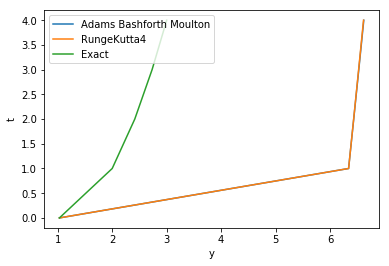

'\nO método preditor corretor, usa o RungeKutta pra estimar até a instância 3,\ne os passos 4 e 5 são explicitos e implicitos.\n'

In [10]:
#EXERCÍCIO 1
#Adams Fourth-Order Predictor-Corrector method

import math, sys 
import numpy as np
import matplotlib.pyplot as plt

def f(y, t):
    return 1.0/(2*(y-1))

def exact_sol(t):
    return 1 + np.sqrt(t + 0.001)
    
y0 = 1.0 + np.sqrt(0.001)

def RungeKutta4(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1)
    y[0] = y0
    t[0] = 0
    dt = T/float(n)

    for k in range(n):
        t[k+1] = t[k] + dt
        K1 = dt * f(y[k], t[k])
        K2 = dt * f(y[k] + 0.5*K1, t[k] + 0.5*dt)
        K3 = dt * f(y[k] + 0.5*K2, t[k] + 0.5*dt)
        K4 = dt * f(y[k] + K3, t[k] + dt)
        y[k+1] = y[k] + (1/6.0)*(K1 + 2*K2 + 2*K3 + K4)
    return y, t

def PredictorCorrector(f, y0, T, n):
    #RungeKutta4
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+2)
    y = np.zeros(n+2)
    y[0] = y0
    t[0] = 0
    dt = T/float(n)
    print("\nVALOR DE H:",dt)
    y, t = RungeKutta4(f, y0, T, n)
    
    f0 = f(y[0],t[0])
    f1 = f(y[1],t[1])
    f2 = f(y[2],t[2])
    f3 = f(y[3],t[3])
    f4 = f(y[4],t[4])
    
    print('Pré calculados por Runge kutta:')
    print('f0:',round(f0,5),'\nf1:',round(f1,5),'\nf2:',round(f2,5),'\nf3:',round(f3,5))
    print('f4 RK4:',round(f4,5))
    
    for k in range(n-1,0,-1):
        #Predictor: The fourth-order Adams-Bashforth technique, an explicit four-step method, is defined as:
        y[k+1] = y[k] + (dt/24) *(55*f3 - 59*f2 + 37*f1 - 9*f0)
        print('\nPredictor y4:', round(y[k+1],5))
        f4_AB = f(y[k+1],t[k+1])
        print('f4 AB4:',round(f4_AB,5))
        
        #Corrector: The fourth-order Adams-Moulton technique, an implicit three-step method, is defined as:              
        y[k+1] = y[k] + (dt/24) *(9*f(y[k+1],t[k+1]) + 19*f3 - 5*f2 + f1)
        print('\nCorrector one y4:', round(y[k+1],6))
        
        y[k+1] = y[k] + (dt/24) *(9*f(y[k+1],t[k+1]) + 19*f3 - 5*f2 + f1)
        print('Corrector two y4:', round(y[k+1],6))
    return y, t

Kutta4 = y1, t1 = RungeKutta4(f, y0, 4, 4)
BashMoulton = y2, t2 = PredictorCorrector(f, y0, 4, 4)
print("\nRunge Kutta:", t1,'\n', y1,'\n')    
print ('Adams-Bashforth-Moulton', t2,'\n',y2,'\n')

#For i = 4, 5, ... we use Adams Fourth-Order Predictor-Corrector method, which consists of 
# the predictor Adams-Bashforth, and corrector Adams-Moulton techniques.
plt.plot(BashMoulton[0], BashMoulton[1])
plt.plot(Kutta4[0], Kutta4[1])
plt.plot(exact_sol(Kutta4[1]), Kutta4[1])

plt.legend(['Adams Bashforth Moulton','RungeKutta4','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()
"""
O método preditor corretor, usa o RungeKutta pra estimar até a instância 3,
e os passos 4 e 5 são explicitos e implicitos.
"""


In [11]:
# running with t = 4 and n = 64 first
Kutta4 = y, t = RungeKutta4(f, y0, 4, 64)
BashMoulton = y1, t1 = PredictorCorrector(f, y0, 4, 64)

print('Runge Kutta')
for i in range(64):
    print(round(y[i],3), end ='\t')
    
print('Adams Bashforth Moulton')
for i in range(64):
    print (round(y1[i],3),end = '\t')

"""
Valores das funções f0, f1, f2 e f3 obtidas por Runge kutta 4,
e f4 obtido apartir dos preditores e corretores com duas correções.
Método rodando com n = 64, em que se obtem aproximação com h = 0,0625
e curva mais aproximada da solução exata. 
"""



VALOR DE H: 0.0625
Pré calculados por Runge kutta:
f0: 15.81139 
f1: 1.26399 
f2: 1.06848 
f3: 0.94242
f4 RK4: 0.85252

Predictor y4: 2.72988
f4 AB4: 0.28904

Corrector one y4: 3.050638
Corrector two y4: 3.049579

Predictor y4: 2.71426
f4 AB4: 0.29167

Corrector one y4: 3.035076
Corrector two y4: 3.033998

Predictor y4: 2.69851
f4 AB4: 0.29438

Corrector one y4: 3.019391
Corrector two y4: 3.018294

Predictor y4: 2.68263
f4 AB4: 0.29715

Corrector one y4: 3.003581
Corrector two y4: 3.002466

Predictor y4: 2.66663
f4 AB4: 0.30001

Corrector one y4: 2.987644
Corrector two y4: 2.986508

Predictor y4: 2.65049
f4 AB4: 0.30294

Corrector one y4: 2.971575
Corrector two y4: 2.970419

Predictor y4: 2.63422
f4 AB4: 0.30596

Corrector one y4: 2.955373
Corrector two y4: 2.954195

Predictor y4: 2.61781
f4 AB4: 0.30906

Corrector one y4: 2.939033
Corrector two y4: 2.937833

Predictor y4: 2.60125
f4 AB4: 0.31226

Corrector one y4: 2.922551
Corrector two y4: 2.921328

Predictor y4: 2.58455
f4 AB4: 0.3

'\nValores das funções f0, f1, f2 e f3 obtidas por Runge kutta 4,\ne f4 obtido apartir dos preditores e corretores com duas correções.\nMétodo rodando com n = 64, em que se obtem aproximação com h = 0,0625\ne curva mais aproximada da solução exata. \n'

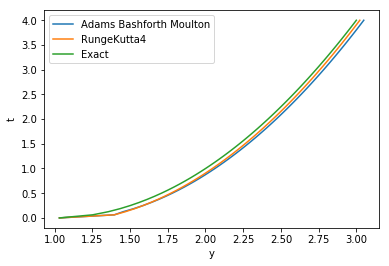

In [3]:
plt.plot(BashMoulton[0], BashMoulton[1])
plt.plot(Kutta4[0], Kutta4[1])
plt.plot(exact_sol(Kutta4[1]), Kutta4[1])

plt.legend(['Adams Bashforth Moulton','RungeKutta4','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()

In [4]:
# running with t = 4 and n = 64 first
Kutta4 = y, t = RungeKutta4(f, y0, 4, 128)
BashMoulton = y1, t1 = PredictorCorrector(f, y0, 4, 128)

print('Runge Kutta')
for i in range(64):
    print(round(y[i],3), end ='\t')
    
print('Adams Bashforth Moulton')
for i in range(64):
    print (round(y1[i],3),end = '\t')

"""
Valores das funções f0, f1, f2 e f3 obtidas por Runge kutta 4,
e f4 obtido apartir dos preditores e corretores com duas correções.
Método rodando com n = 64, em que se obtem aproximação com h = 0,0625
e curva mais aproximada da solução exata. 
"""



VALOR DE H: 0.03125
Pré calculados por Runge kutta:
f0: 15.81139 
f1: 2.18494 
f2: 1.72908 
f3: 1.47525
f4 RK4: 1.30802

Predictor y4: 2.89026
f4 AB4: 0.26451

Corrector one y4: 3.028651
Corrector two y4: 3.028439

Predictor y4: 2.88242
f4 AB4: 0.26562

Corrector one y4: 3.020826
Corrector two y4: 3.020613

Predictor y4: 2.87455
f4 AB4: 0.26673

Corrector one y4: 3.01297
Corrector two y4: 3.012755

Predictor y4: 2.86665
f4 AB4: 0.26786

Corrector one y4: 3.005083
Corrector two y4: 3.004867

Predictor y4: 2.85872
f4 AB4: 0.269

Corrector one y4: 2.997165
Corrector two y4: 2.996946

Predictor y4: 2.85075
f4 AB4: 0.27016

Corrector one y4: 2.989214
Corrector two y4: 2.988994

Predictor y4: 2.84276
f4 AB4: 0.27133

Corrector one y4: 2.981232
Corrector two y4: 2.981009

Predictor y4: 2.83473
f4 AB4: 0.27252

Corrector one y4: 2.973216
Corrector two y4: 2.972992

Predictor y4: 2.82667
f4 AB4: 0.27372

Corrector one y4: 2.965167
Corrector two y4: 2.964941

Predictor y4: 2.81857
f4 AB4: 0.274

Corrector two y4: 1.496517

Predictor y4: 1.31395
f4 AB4: 1.59264

Corrector one y4: 1.467903
Corrector two y4: 1.461762

Predictor y4: 1.27505
f4 AB4: 1.81786

Corrector one y4: 1.431646
Corrector two y4: 1.423917

Predictor y4: 1.23172
f4 AB4: 2.15781

Corrector one y4: 1.392298
Corrector two y4: 1.381947

Predictor y4: 1.18196
f4 AB4: 2.74782

Corrector one y4: 1.349458
Corrector two y4: 1.334024

Predictor y4: 1.12163
f4 AB4: 4.11082

Corrector one y4: 1.305098
Corrector two y4: 1.276129
Runge Kutta
1.032	1.229	1.289	1.339	1.382	1.421	1.457	1.49	1.521	1.55	1.578	1.604	1.629	1.654	1.677	1.7	1.722	1.743	1.764	1.784	1.804	1.823	1.842	1.86	1.878	1.896	1.913	1.93	1.947	1.963	1.979	1.995	2.011	2.026	2.041	2.056	2.071	2.085	2.099	2.113	2.127	2.141	2.155	2.168	2.182	2.195	2.208	2.221	2.233	2.246	2.258	2.271	2.283	2.295	2.307	2.319	2.331	2.343	2.354	2.366	2.377	2.388	2.4	2.411	Adams Bashforth Moulton
1.032	1.229	1.276	1.334	1.382	1.424	1.462	1.497	1.529	1.559	1.588	1.615	1.641	1.666	1.69	1.

'\nValores das funções f0, f1, f2 e f3 obtidas por Runge kutta 4,\ne f4 obtido apartir dos preditores e corretores com duas correções.\nMétodo rodando com n = 64, em que se obtem aproximação com h = 0,0625\ne curva mais aproximada da solução exata. \n'

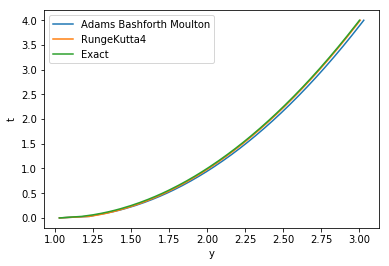

In [5]:
plt.plot(BashMoulton[0], BashMoulton[1])
plt.plot(Kutta4[0], Kutta4[1])
plt.plot(exact_sol(Kutta4[1]), Kutta4[1])

plt.legend(['Adams Bashforth Moulton','RungeKutta4','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()

h 0.25


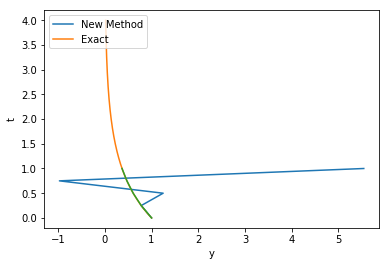

h 0.125


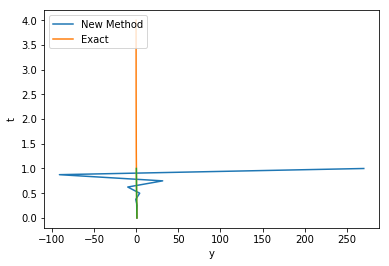

h 0.0625


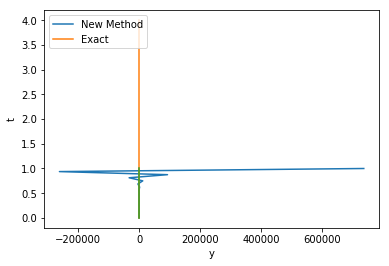

h 0.03125


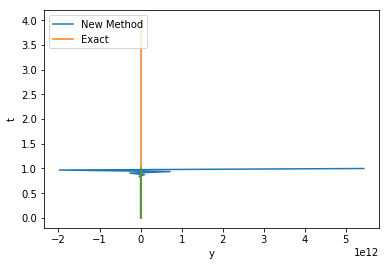

h 0.015625


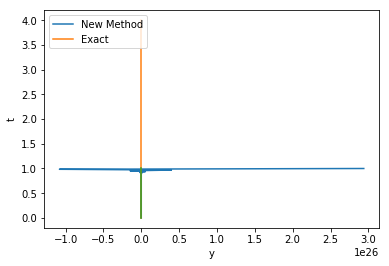

In [27]:
#EXERCÍCIO 5
import numpy as np
import matplotlib.pyplot as plt

def f(y, t):
    return (-y)

def exact_sol(t):
    return (1/np.exp(t))
    
y0 = 1.0

# derivada de y
def dy(y,t):
    return (-1)

#derivada segunda de y
def dyy(y,t):
    return (0)

def Taylor(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1)  # y[k] is the solution at time t[k]
    
    y[0] = y0
    t[0] = 0 #t0
    dt = T/float(n)
    print('h',dt)
    
    for k in range(n):
        t[k+1] = t[k] + dt  
        fk = f(y[k],t[k]) # f em t(k), y(k)
        dfk = dy(y[k],t[k]) # dy de f em t(k), y(k)
        ddfk = dyy(y[k],t[k]) # dyy de f em t(k), y(k)
        t1 = dt * fk
        t2 = ((dt**2)/2) * dfk * fk
        t3 = ((dt**3)/6) * ((ddfk * (fk**2)) + ((dfk**2) * fk))
        y[k+1] = y[k] + t1 + t2 + t3    
    return y, t

def new_method(f, y0, T, n, j = 3):
    t = np.zeros(n+1)
    y = np.zeros(n+1)  # y[k] is the solution at time t[k]
    
    #y[0] = y0
    t[0] = 0 #t0
    dt = T/float(n)
    y[0:j] = y0[0:j]
    
    for j in range(j):
        t[j+1] = t[j] + dt
        
    for k in range(j-1, n):
        t[k+1] = t[k] + dt
        y[k+1] = (-1.5)*y[k] + 3.0*y[k-1] -(0.5)*y[k-2] + 3.0*dt*f(y[k], t[k])
        
    return y, t 

for j in range(1,6):
    n = 2**(j+1)
    y1, t = Taylor(f, y0, 1, n)
    temp = y, t = new_method(f, y1, 1, n)
    yexact = exact_sol(t)

    plt.plot(temp[0], temp[1])
    #plt.plot(exact_sol(Kutta4[1]), Kutta4[1])
    plt.plot(exact_sol(temp[1]), temp[1])

    plt.legend(['New Method', 'Exact'], loc = 2)
    plt.xlabel('y')
    plt.ylabel('t')
    plt.show()